<a href="https://colab.research.google.com/github/danon6868/BI-ml-2024/blob/main/lecture_9_cnn/homework/hw_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1. Свёртка

**5 баллов**

Реализуйте функцию свёртки `conv(x, kernel, stride, pad)`, где:


* $\text{x}$: Двумерный массив размером $(W,H)$;
* $\text{kernel}$: ядро свёртки размером $(K, K)$;
* $\text{stride}$: шаг ядра свёртки. $0 < \text{stride} \leq \min(W,H)$;
* $\text{pad}$: ширина дополнения с каждой из сторон массива. $\text{pad} > 0$.

Результатм работы функции является возвращение следующего значения:
* $out$: Результат свертки входных данных $\text{x}$, имеющий размер $(H', W')$:
  - $H' = 1 + (H + 2 \cdot pad - K)\ //\  stride$;
  - $W' = 1 + (W + 2 \cdot pad - K)\  //\ stride$.

---

Воспользуйтесь созданной функцией `conv` для применения [оператора Собеля](https://ru.wikipedia.org/wiki/%D0%9E%D0%BF%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80_%D0%A1%D0%BE%D0%B1%D0%B5%D0%BB%D1%8F)
к изображению, после чего выведите результат на экран.

Можно работать и с `numpy`, и с `torch`, как вам угодно.

In [1]:
import torch
import numpy as np

In [3]:
# Можете тренироваться на этом примере
a = np.arange(9).reshape((3, 3))
M = np.block([[a, a],[a, a]])
print(M)

[[0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]
 [0 1 2 0 1 2]
 [3 4 5 3 4 5]
 [6 7 8 6 7 8]]


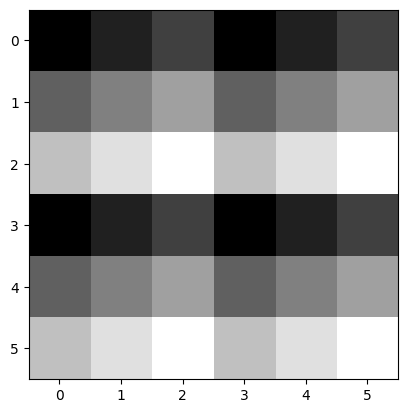

In [37]:
plt.figure()
plt.imshow(M, cmap="gray", vmin=M.min(), vmax=M.max())

In [38]:
def conv(x, kernel, stride, pad):
    # YOUR CODE IS HERE
    H, W = x.shape
    K = kernel.shape[0]
    H_out = 1 + (H + 2 * pad - K) // stride
    W_out = 1 + (W + 2 * pad - K) // stride
    x_padded = np.pad(x, pad, mode='empty') #constant

    # Инициализируем результирующий массив
    out = np.zeros((H_out, W_out))
    for i in range(0, H_out):
        for j in range(0, W_out):
            # Вычисляем координаты начала окна свертки
            start_i = i * stride
            start_j = j * stride

            # Выполняем свертку для текущего окна
            window = x_padded[start_i:start_i+K, start_j:start_j+K]
            out[i, j] = np.sum(window * kernel)

    return out

In [39]:
sobel_kernel_vert = torch.Tensor([ #обнаружение вертикальных границ
                                  [-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]
])


sobel_kernel_hor = torch.Tensor([ #обнаружение горизонтальных границ
                                 [-1, -2, -1],
                                 [0, 0, 0],
                                 [1, 2, 1]
])
sobel_kernel_vert = sobel_kernel_vert.numpy()
sobel_kernel_hor = sobel_kernel_hor.numpy()

In [47]:
sobel_vert_result = conv(M, sobel_kernel_vert, stride=1, pad=1)
sobel_hor_result = conv(M, sobel_kernel_hor, stride=1, pad=1)
np.set_printoptions(suppress=True)
print(f"Результат свертки оператором Собеля по x:\n{sobel_vert_result.astype('int')}")
print(f"\n\nРезультат свертки оператором Собеля по y:\n{sobel_hor_result.astype('int')}")

Результат свертки оператором Собеля по x:
[[-399339337354872   99855564312262               15   32985962230765
   132841914446948       9013523466]
 [-134431052384420                8               -4               -4
                 8       4294967280]
 [   -794568949863                8               -4               -4
                 8              -19]
 [              13                8               -4               -4
                 8              -13]
 [              16                8               -4               -4
                 8  132838000483632]
 [      4039335170      -4039334122  -32986358199475       4018224957
    32986362599094  265671982709454]]


Результат свертки оператором Собеля по y:
[[-132066370485760  -99855564312240 -199711128624513 -232697090855301
  -398524967533010 -531367305568834]
 [-132841914484654               24               24               24
                24      -4294967278]
 [   -794568949891              -12              -12     

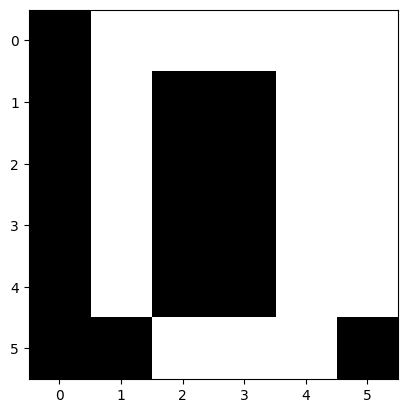

In [43]:
plt.figure()
plt.imshow(sobel_vert_result, cmap="gray", vmin=M.min(), vmax=M.max())

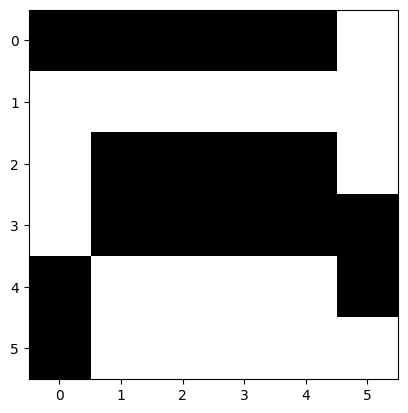

In [44]:
plt.figure()
plt.imshow(sobel_hor_result, cmap="gray", vmin=M.min(), vmax=M.max())

Примените эти два фильтра к следующей картинке и нарисуйте полученные результаты:

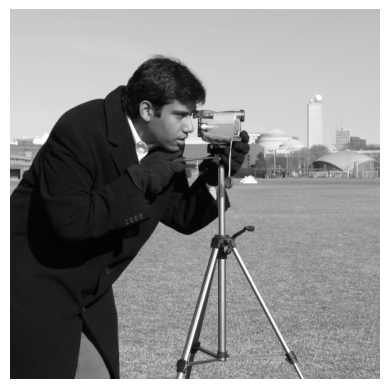

In [16]:
from skimage import data
import matplotlib.pyplot as plt

camera = data.camera()
plt.figure()
plt.imshow(camera.astype("int"), cmap="gray", vmin=0, vmax=255)
plt.axis("off");

Допишите код ниже и проинтерпретируйте полученный результат:

In [19]:
sobel_vert_img = conv(camera, sobel_kernel_vert, stride=1, pad=1)
sobel_hor__img = conv(camera, sobel_kernel_hor, stride=1, pad=1)

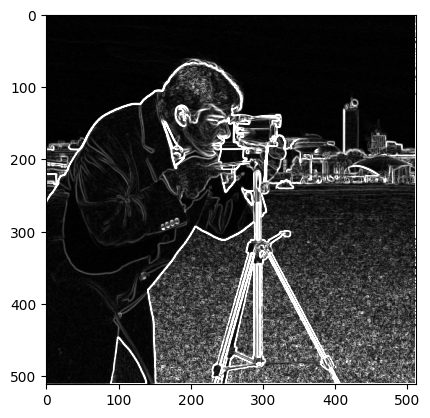

In [20]:
camera_s_hor_filter = sobel_vert_img# результат применения sobel_kernel_hor
camera_s_vert_filter = sobel_hor__img# результат применения sobel_kernel_vert
camera_with_borders = np.sqrt(camera_s_hor_filter**2 + camera_s_vert_filter**2)
plt.imshow(camera_with_borders, cmap="gray", vmin=0, vmax=255);

In [22]:
camera.astype('int')

array([[200, 200, 200, ..., 189, 190, 190],
       [200, 199, 199, ..., 190, 190, 190],
       [199, 199, 199, ..., 190, 190, 190],
       ...,
       [ 25,  25,  27, ..., 139, 122, 147],
       [ 25,  25,  26, ..., 158, 141, 168],
       [ 25,  25,  27, ..., 151, 152, 149]])

In [21]:
camera_with_borders.astype('int')

array([[281, 235, 109, ..., 416, 451, 275],
       [193,   4,   4, ...,   3,   1, 550],
       [223,   2,   2, ...,   0,   0, 550],
       ...,
       [101,   6,   5, ..., 132,  38, 534],
       [100,   6,   3, ...,  47,  78, 557],
       [106, 101, 101, ..., 596, 608, 652]])

<font color="#e8851c"> **Интерпретация результатов**

<font color="darkblue"> В результате обработки границы объектов выделились, а фон ушёл. Так вышло, так ка мы как раз выделили те части, которые являются границами, они окрасились в белый (более маленькие значения в матрице). При этом то, что не выделелось нашими ядрами Собеля затемнилось (увеличло свои значения в матрице)

## Задание 2. AlexNet

**15 баллов**

Воссоздайте архитектуру `AlexNet` для определения заболевания растения. Датасеты уже созданы ниже.

In [2]:
INPUT_IMAGE_SIZE = 227
BATCH_SIZE = 64
N_EPOCHS = 10 # можно будет при желании увеличить
DEVICE = "cpu"#"cuda" if torch.cuda.is_available() else "cpu"

In [3]:
from IPython.display import clear_output

from torchvision.io import read_image
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import ToTensor, Compose, ToPILImage
from torchvision.transforms import Normalize, Resize

from glob import glob
from torch import nn
from torch.nn import functional as F
import torch
import os

import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
!wget https://storage.googleapis.com/ibeans/train.zip
!wget https://storage.googleapis.com/ibeans/validation.zip
!wget https://storage.googleapis.com/ibeans/test.zip

clear_output()

In [5]:
!unzip train.zip
!unzip validation.zip
!unzip test.zip

clear_output()

In [6]:
class BeanDataset(Dataset):
    def __init__(self, img_dir, side_size=INPUT_IMAGE_SIZE):
        # папка с картинками
        self.img_dir = img_dir
        # отсортированный список с названиями файлов
        self.files = sorted(glob(f'{img_dir}/*/*.jpg'))
        class_names = sorted(os.listdir(img_dir))
        # названия папок с картинками переведем в номера классов
        self.class_dir = {name:idx for idx, name in enumerate(class_names)}
        self._number_to_labels = {idx:name for idx, name in enumerate(class_names)}

        # трансформации данных: мы изменяем размер,
        # так как AlexNet работает с картинками 227 на 227 пикселей
        self.transforms = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor(),
                                  Normalize(
                                      mean = [0.5183, 0.4845, 0.6570],
                                      std = [0.2111, 0.2227, 0.2291]
                                  )])
        self._transforms_for_plot = Compose([ToPILImage(),
                                  Resize(side_size),
                                  ToTensor()
                                  ])


    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx, normalize=True):
        file_path = self.files[idx]
        image = read_image(file_path).type(torch.DoubleTensor)

        # применяем трансформации
        if normalize:
            transformed_img = self.transforms(image)

        transformed_img = self._transforms_for_plot(image)

        label_name = file_path.split('/')[-2]
        label = self.class_dir[label_name]

        # как обычно возвращаем картинку и номер класса
        return transformed_img, label

In [7]:
train_dataset = BeanDataset("./train/")
valid_dataset = BeanDataset("./validation/")
test_dataset = BeanDataset("./test/")

trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

Посмотрим на наши картинки:

(код довольно эзотерический, но у меня было такое настроение)

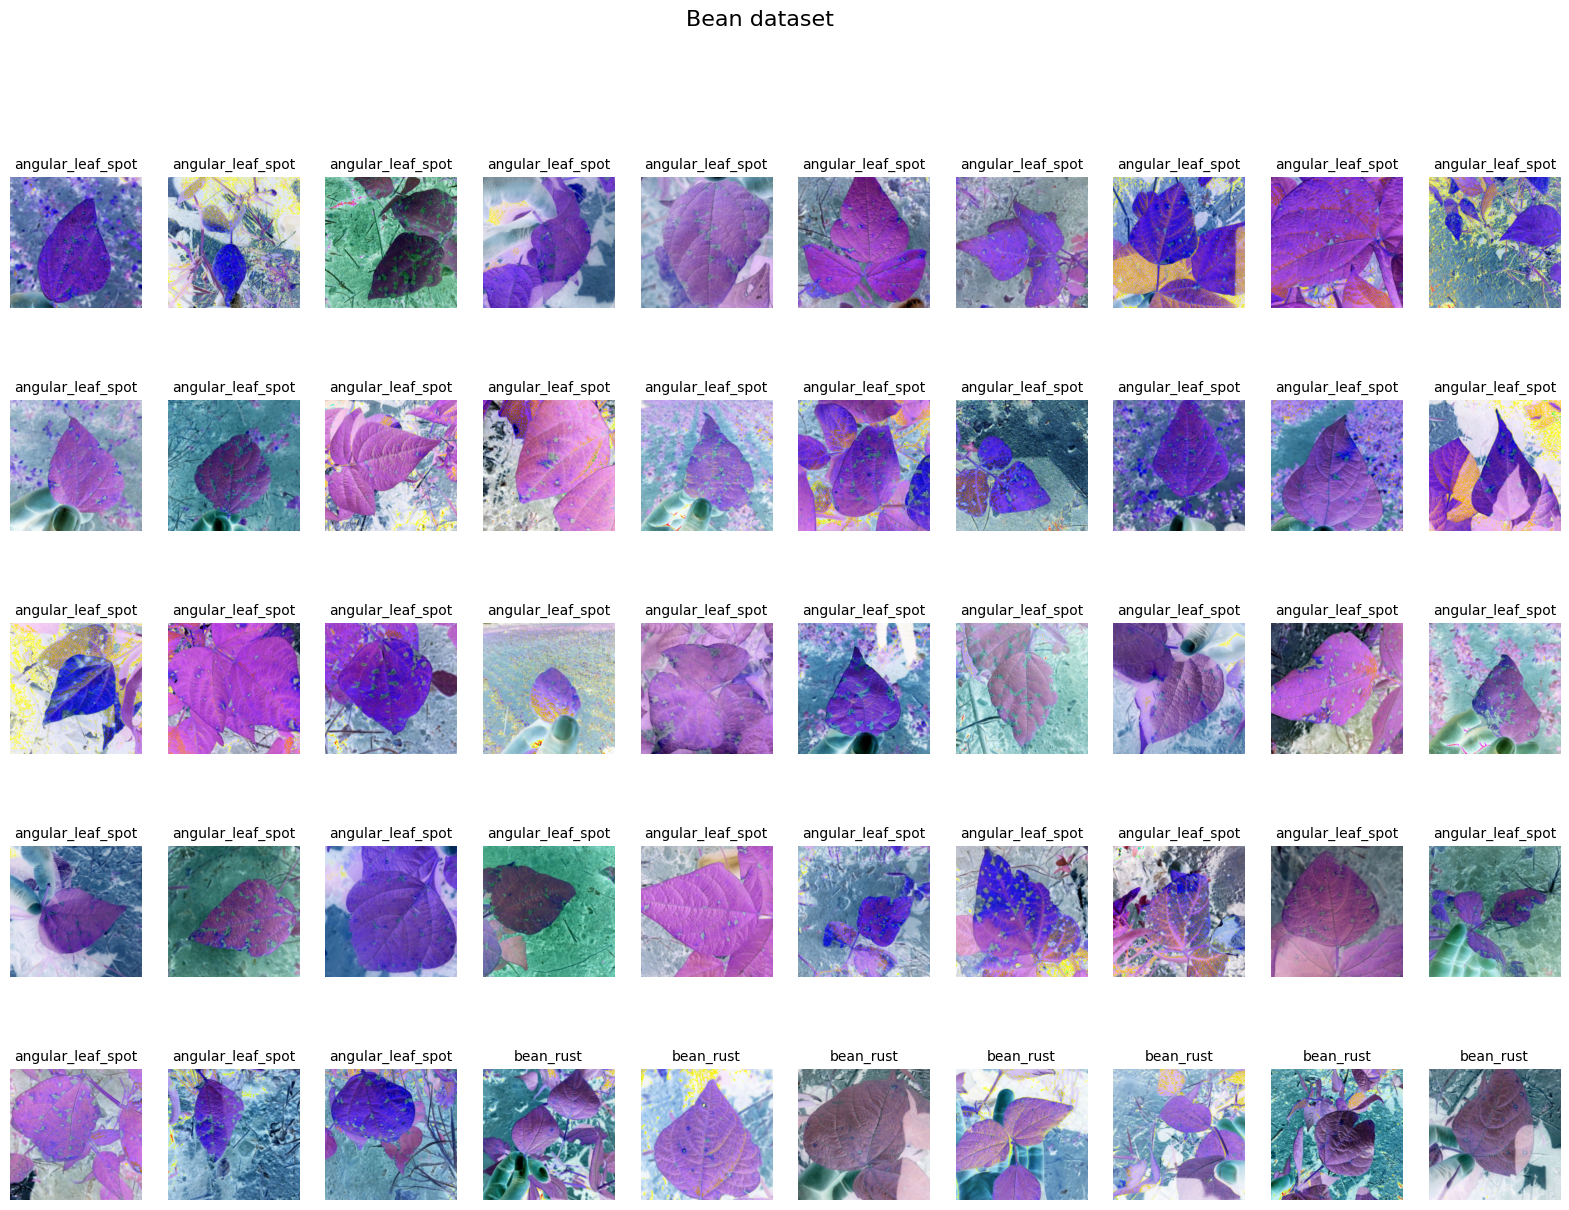

In [8]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))
    title = valid_dataset._number_to_labels[valid_dataset.__getitem__(index, normalize=False)[1]]
    plt.title(title, fontsize=10)

fig.suptitle("Bean dataset", fontsize=16);

### Реализация `AlexNet`

В лекции мы познакомились с архитектурой `AlexNet`, теперь пришло время реализовать ее самостоятельно. Важно, что на выходе число классов у нас будет сильно меньше чем 1000, нужно будет в начале это определить. Везде в качестве активации используется `ReLU`.

Также обратите внимание на параметры пулинга, тут ядро 3х3 со страйдом 2 (поэтому он называется overlapping).

Картинка может немного отличаться от того, что было на лекции, ориентируйтесь на картинку в ноутбуке.

Внимательно смотрите на параметры сверток (например, padding / stride).

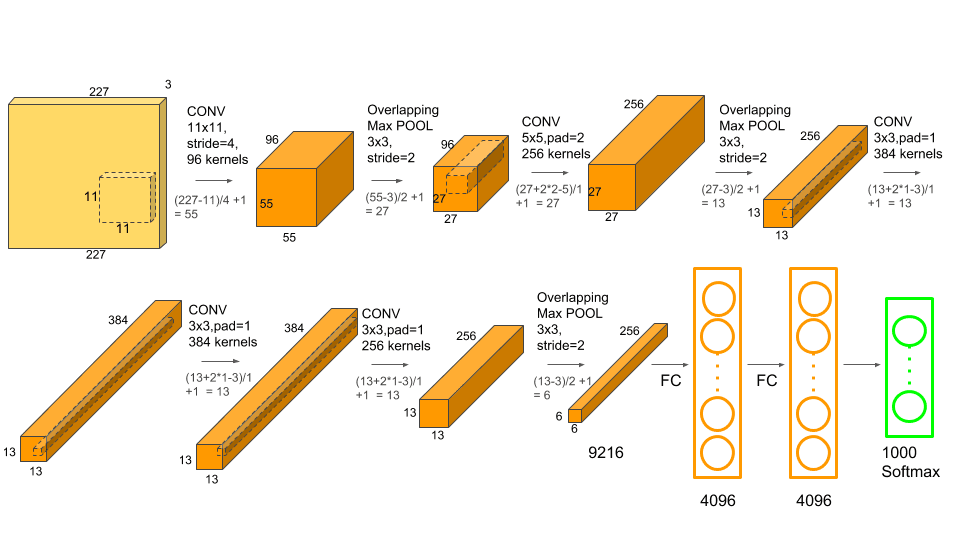

In [9]:
N_CLASSES = len(train_dataset._number_to_labels )# определите число классов в данных
LEARNING_RATE = 3e-4 # можно подобрать как-то другой)

In [27]:
class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        # YOUR CODE IS HERE
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=1),#96
            nn.BatchNorm2d(96),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.ReLU(inplace=True),

            nn.Conv2d(96, 256, kernel_size=5, padding=2),#96 & 256
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.BatchNorm2d(384),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.ReLU(inplace=True),
        )


        self.classifier = nn.Sequential(
          #  nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            # nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
        )
        self.output = nn.Linear(4096, N_CLASSES)  # Выходной слой для бинарной классификации
        #40960to n_classes siftmax


    def forward(self,x):
        # YOUR CODE IS HERE
        x = self.feature_extractor(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        logits = self.output(x)
        probs = torch.nn.functional.softmax(logits, dim=1)
        return logits, probs

Возьмите код для обучения и валидации модели, который был на лекции (если захочется, то его можно как угодно менять). В лекции мы возвращали из модели помимо логитов еще и вероятности классов, чтобы потом рисовать красивые картинки. Если захотите сделать также, то учтите это.

In [15]:
def train_epoch(train_loader, model, criterion, optimizer, device):
    """
    Function for the training step of the training loop
    """

    model.train()
    running_loss = 0

    for X, y_true in train_loader:

        optimizer.zero_grad() #чтобы градиенты не суммировались

        X = X.to(device) #переносим на девайсы
        y_true = y_true.to(device)

        y_hat, _ = model(X) #делаем предсказания, но вероятности нам не нужны, только логиты
        loss = criterion(y_hat, y_true) #кладем в функцию потерь - сначла предикт, потом тру!
        running_loss += loss.item() * X.size(0) # суммируем лосс

        loss.backward() #возвращаемся
        optimizer.step() #делаем шаг

    epoch_loss = running_loss / len(train_loader.dataset) #усреднеям лосс по эпохе
    return model, optimizer, epoch_loss #хотя модель и так меняется, она изменяемый объект. Просто лучше пусть возваращется


def validate_epoch(valid_loader, model, criterion, device):
    """
    Function for the validation step of the training loop
    """

    model.eval()
    running_loss = 0

    for X, y_true in valid_loader:

        X = X.to(device)
        y_true = y_true.to(device)

        y_hat, _ = model(X)
        loss = criterion(y_hat, y_true)
        running_loss += loss.item() * X.size(0)

    epoch_loss = running_loss / len(valid_loader.dataset)

    return model, epoch_loss


def get_accuracy(model, dataloader, device):
    """
    model -
    dataloader -
    """
    correct = 0
    total = 0
    with torch.no_grad(): # Тензоры внутри этого блока будут иметь requires_grad=False
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs, _ = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total

    return accuracy


def plot_losses(train_losses, valid_losses):
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=train_losses, label="Train Loss")
    sns.lineplot(x=np.arange(1, len(train_losses)+1), y=valid_losses, label="Validation Loss")


def training_loop(model, criterion, optimizer, train_loader, valid_loader, epochs, device, print_every=1):
    """
    Function defining the entire training loop
    """

    best_loss = 1e10
    train_losses = []
    valid_losses = []

    # Train model
    for epoch in range(0, epochs):

        # training
        model, optimizer, train_loss = train_epoch(train_loader, model, criterion, optimizer, device)
        train_losses.append(train_loss)

        # validation
        with torch.no_grad():
            model, valid_loss = validate_epoch(valid_loader, model, criterion, device)
            valid_losses.append(valid_loss)

        if epoch % print_every == (print_every - 1):

            train_acc = get_accuracy(model, train_loader, device=device)
            valid_acc = get_accuracy(model, valid_loader, device=device)

            print(f'{datetime.now().time().replace(microsecond=0)} --- '
                  f'Epoch: {epoch}\t'
                  f'Train loss: {train_loss:.4f}\t'
                  f'Valid loss: {valid_loss:.4f}\t'
                  f'Train accuracy: {100 * train_acc:.2f}\t'
                  f'Valid accuracy: {100 * valid_acc:.2f}')

    plot_losses(train_losses, valid_losses)

    return model, train_losses, valid_losses

Выберите функцию потерь и оптимизатор и обучите полученную модель на тренировочных данных, параллельно проверяя ее на валидационной части:

In [30]:
model = AlexNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE) # Оптимизатор
criterion = nn.CrossEntropyLoss()# Функция потерь

In [14]:
!nvidia-smi #тут будет ноль, пришлось перейти на GPU - коллаб выдал ограничение мне ><

Sun Apr 21 16:19:33 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0              27W /  70W |    831MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

18:53:04 --- Epoch: 0	Train loss: 2.3400	Valid loss: 1.0407	Train accuracy: 50.29	Valid accuracy: 54.14
18:58:00 --- Epoch: 1	Train loss: 0.8677	Valid loss: 0.8225	Train accuracy: 65.86	Valid accuracy: 63.91
19:02:43 --- Epoch: 2	Train loss: 0.7623	Valid loss: 0.8400	Train accuracy: 62.96	Valid accuracy: 62.41
19:07:16 --- Epoch: 3	Train loss: 0.7322	Valid loss: 0.7126	Train accuracy: 75.44	Valid accuracy: 66.92
19:11:50 --- Epoch: 4	Train loss: 0.6463	Valid loss: 1.2466	Train accuracy: 59.77	Valid accuracy: 57.14
19:16:21 --- Epoch: 5	Train loss: 0.6318	Valid loss: 0.7607	Train accuracy: 74.95	Valid accuracy: 67.67
19:20:51 --- Epoch: 6	Train loss: 0.5759	Valid loss: 1.1678	Train accuracy: 57.54	Valid accuracy: 45.86
19:25:24 --- Epoch: 7	Train loss: 0.5101	Valid loss: 0.5996	Train accuracy: 80.08	Valid accuracy: 78.20
19:29:57 --- Epoch: 8	Train loss: 0.4952	Valid loss: 0.7766	Train accuracy: 76.60	Valid accuracy: 69.17
19:34:35 --- Epoch: 9	Train loss: 0.4214	Valid loss: 0.7281	Trai

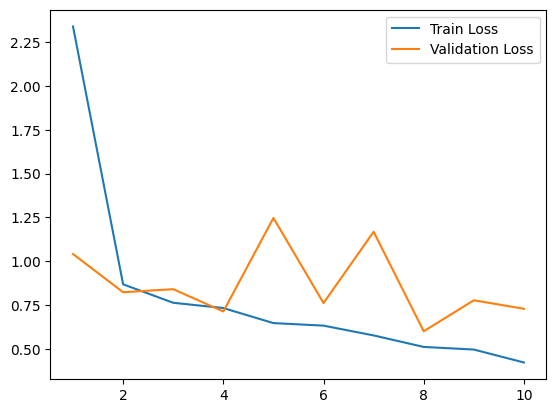

In [31]:
model, train_losses, val_losses = training_loop(model, criterion, optimizer, trainloader, validloader, N_EPOCHS, DEVICE)

In [32]:
accuracy = get_accuracy(model, validloader, DEVICE)
print(f'Accuracy on validation data: {accuracy}')

Accuracy on validation data: 0.6842105263157895


<font color="#e8851c"> **Я ещё делала модель без BatchNorm2d, ниже её результаты**

На Adam без BatchNorm2d максимальный accuracy был 80,45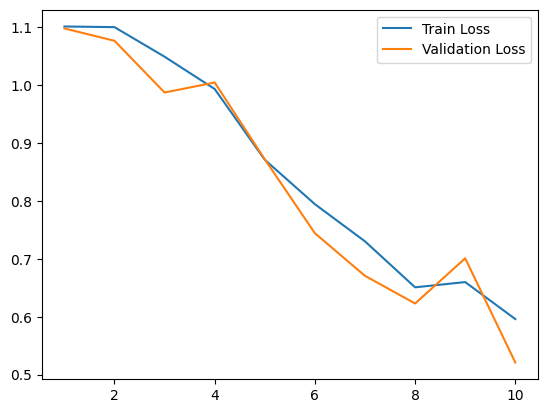

In [28]:
# это тот старый accuracy без BatchNorm2d

accuracy = get_accuracy(model, validloader, DEVICE)
print(f'Accuracy on validation data: {accuracy}')


Accuracy on validation data: 0.8045112781954887


Если вы все реализовали правильно, то `accuracy` на валидации должна быть в районе 0.8.

### Визуализация предсказаний

Визуализируем предсказания нашей модели и степень уверенности в них. Сделайте выводы о качестве полученной модели.

<font color="#e8851c"> **Так как модель с BatchNorm2d, дала результаты лучше, здесь приведена картинка именно для нее. Даже она не всегда с достаточной уверенностью говорит о предсказании (тут есть примеры с 45)**

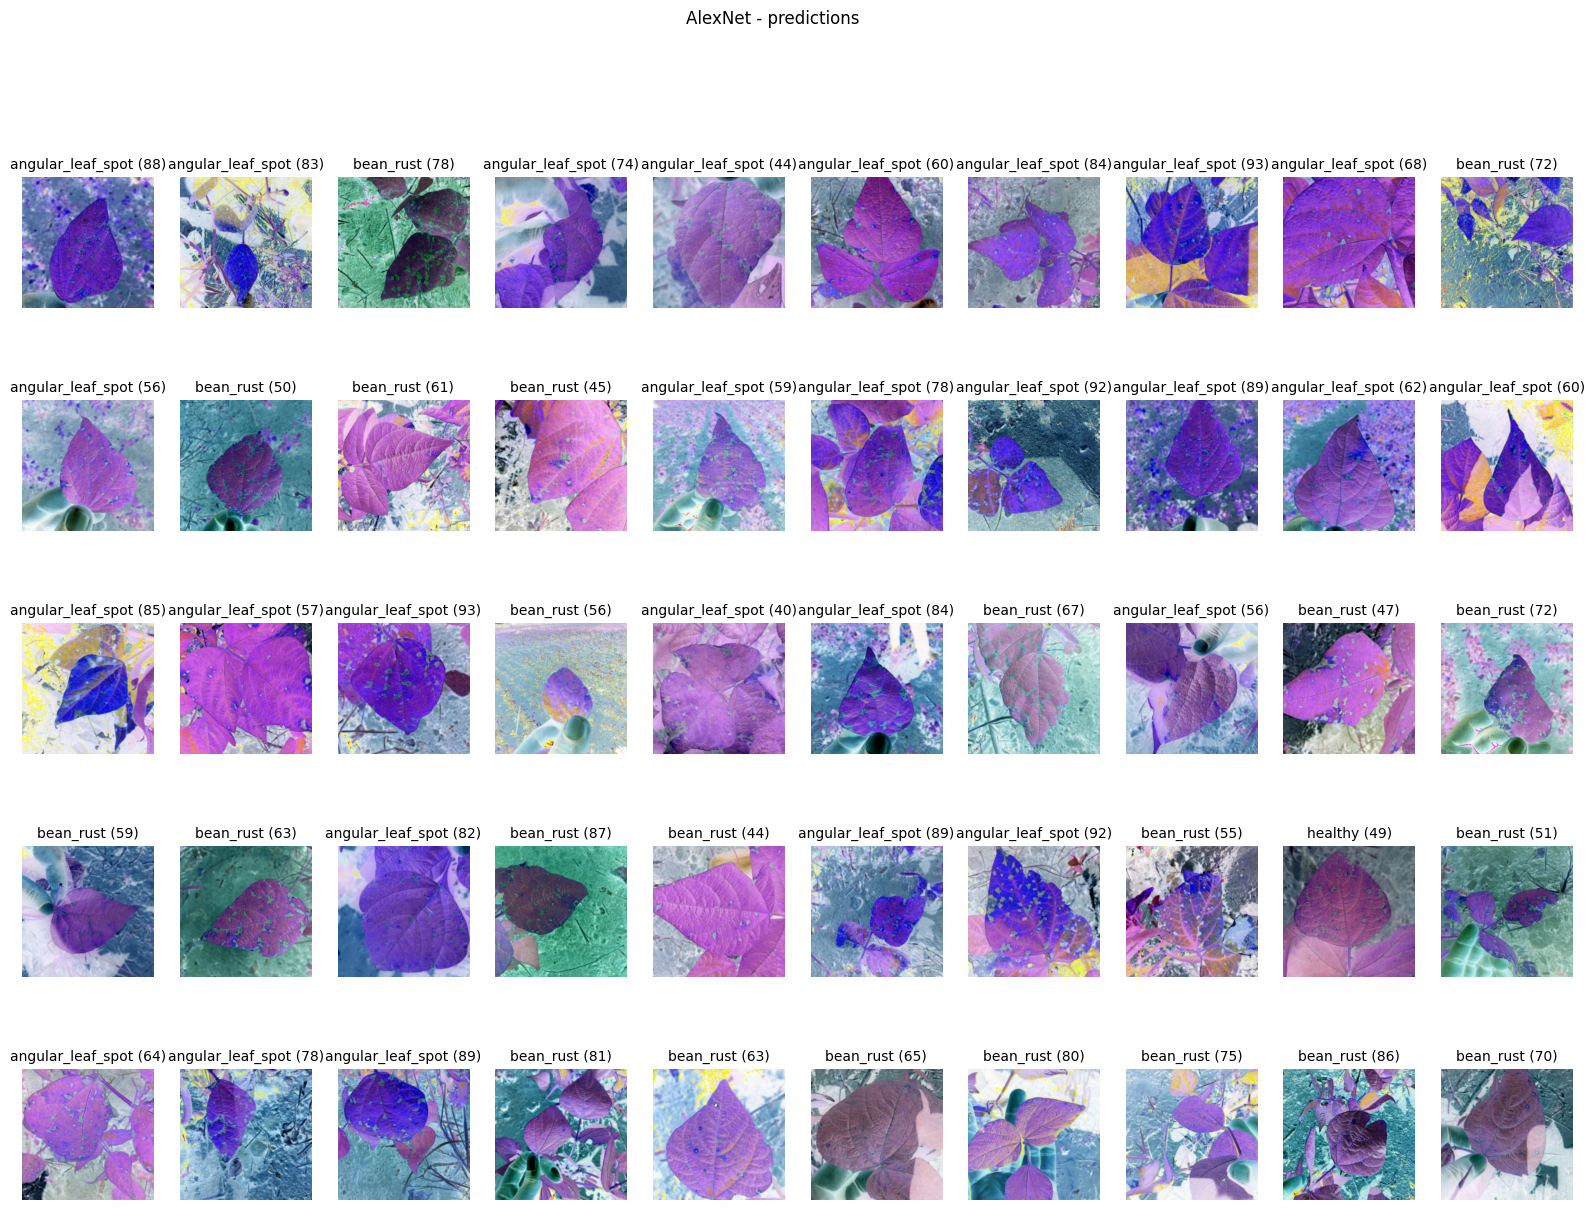

In [29]:
ROW_IMG = 10
N_ROWS = 5

fig = plt.figure(figsize=(20, 14))
for index in range(1, ROW_IMG * N_ROWS + 1):
    plt.subplot(N_ROWS, ROW_IMG, index)
    plt.axis('off')
    plt.imshow(valid_dataset.__getitem__(index, normalize=False)[0].permute(1, 2, 0))

    with torch.no_grad():
        # error)
        model.cpu().eval()
        _, probs = model(valid_dataset[index][0].unsqueeze(0))

    title = f'{torch.argmax(probs)} ({torch.max(probs * 100):.0f}%)'
    title = f"{valid_dataset._number_to_labels[torch.argmax(probs).item()]} ({torch.max(probs * 100):.0f})"

    plt.title(title, fontsize=10)
fig.suptitle('AlexNet - predictions');

<font color="#e8851c"> **Интерпретация результатов**

<font color="darkblue"> Интересно и внезапно, что модель с BatchNorm2d работает лучше. Я использовала оптимизатор Adam. Обе модели и довольно хорошо предсказывают болезни (тут лучше проконсультироваться со специалистом, у меня вечный проблемы с определением всего, кроме паутинного клеща))) Мне кажется 68% это тоже хорошо) На лекции было сказано, что ReLu идет после свертки и пулинга, поэтому я релизовала так. Интересно было бы сравнить с использованием ReLu на каждом этапе или именно после этапа севртки, [как сделано тут](https://blog.paperspace.com/alexnet-pytorch/). Для улучшения работы модели можно также попробовать другие способы оптимизации вроде NAdam, SGD, Adagrad. Жаль на GPU все медленно считается))

## Задание 3. И снова социализация

**1 дополнительный балл**

Однажды такое уже бывало, но почему бы не повторить. Сходите погулять вместе с одногруппниками или созвонитесь в зуме, а сюда прикрепите какие-нибудь фотографии и кратко опишите, на какие темы вы общались)

<font color="darkblue"> Говорили о том что жизнь сложны и мы все капец как устали!)

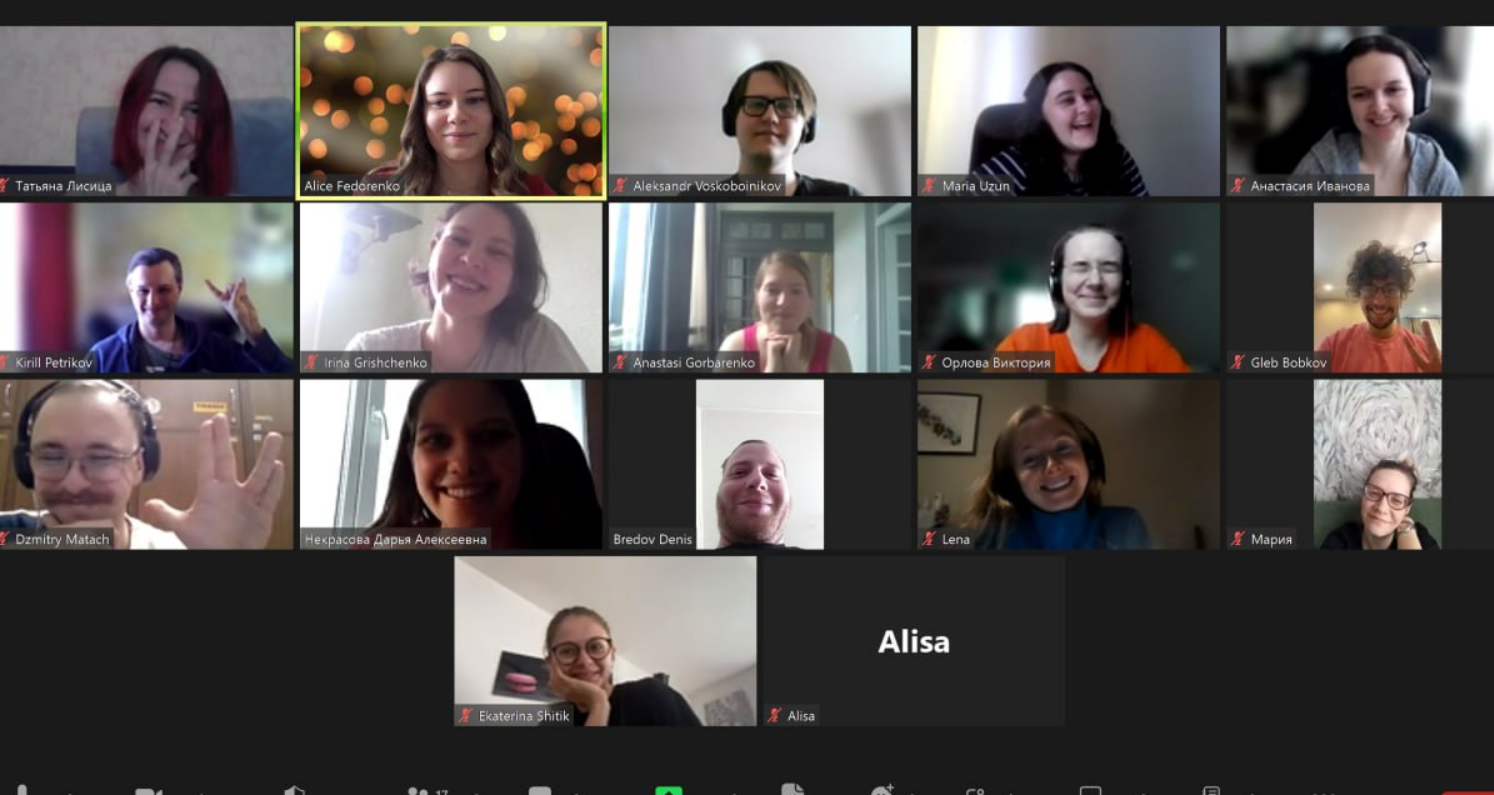

Тут, как обычно, можно описать свои эмоции от выполнения этого задания:

**Ответ:**

Ммм, было интересно, но времени бы еще побольше на домашку :) А то поиграться с парамтерами уже не очень успела. (Сперва просто долго разбиралсь с cuda, потому она отлетела... Было бы очень круто получить мастер-решения по этому и предыдущим ДЗ после дедлайна)